In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score,precision_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [7]:
!pip install sweetviz 

In [8]:
import sweetviz as sw

In [9]:
maintenance_data=pd.read_csv("E:\DataScience\ExcelR\Project\Maintenance.csv")
maintenance_data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [10]:
maintenance_data['Product ID'].nunique()

10000

In [11]:
maintenance_data['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

### Initial investigation

In [12]:
maintenance_data.shape

(10000, 14)

In [13]:
maintenance_data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [14]:
maintenance_data.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

#### tool wear failure - 

heat dissipation failure - difference of air temperature and process temperature < 8.6k and tools rotational speed below 1380rpm

power failure - product of torque and rotational speed ( 3500-9000--> safe)

overstrain failure - product of tool wear and torque exceeds (11000-L,12000-M,13000-H)

random failures - each process has a chance of 0.1 % to fail 

In [15]:
maintenance_data.drop_duplicates(inplace=True)

In [16]:
maintenance_data.shape

(10000, 14)

In [17]:
maintenance_data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [18]:
maintenance_data['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [19]:
maintenance_data['TWF'].value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [20]:
maintenance_data['HDF'].value_counts()

0    9885
1     115
Name: HDF, dtype: int64

In [21]:
maintenance_data['PWF'].value_counts()

0    9905
1      95
Name: PWF, dtype: int64

In [22]:
maintenance_data['OSF'].value_counts()

0    9902
1      98
Name: OSF, dtype: int64

In [23]:
maintenance_data['RNF'].value_counts()

0    9981
1      19
Name: RNF, dtype: int64

Take Aways

The failure due to heat dissipation is quiet high compared to other types of failure

In [24]:
maintenance_data['TWF'].value_counts()[1] & maintenance_data['HDF'].value_counts()[1]

34

In [25]:
maintenance_data['TWF'].value_counts()[1] & maintenance_data['PWF'].value_counts()[1]

14

In [26]:
maintenance_data['TWF'].value_counts()[1] & maintenance_data['OSF'].value_counts()[1]

34

In [27]:
maintenance_data['TWF'].value_counts()[1] & maintenance_data['RNF'].value_counts()[1]

2

In [28]:
maintenance_data['PWF'].value_counts()[1] & maintenance_data['OSF'].value_counts()[1]

66

In [29]:
maintenance_data['PWF'].value_counts()[1] & maintenance_data['RNF'].value_counts()[1]

19

In [30]:
maintenance_data['PWF'].value_counts()[1] & maintenance_data['HDF'].value_counts()[1]

83

In [31]:
maintenance_data['OSF'].value_counts()[1] & maintenance_data['RNF'].value_counts()[1]

2

In [32]:
maintenance_data['OSF'].value_counts()[1] & maintenance_data['HDF'].value_counts()[1]

98

In [33]:
maintenance_data['RNF'].value_counts()[1] & maintenance_data['HDF'].value_counts()[1]

19

Summary

1) combo of tool wear failure  occurs with 
    
    heat dissipation failure - 34
    
    power failure - 14
    
    overstrain failure - 34
    
    random failures - 2
   
2) combo of heat dissipation failure  occurs with 
    
    tool wear failure - 34
    
    power failure - 83
    
    overstrain failure - 98
    
    random failures - 19
  
3) combo of power failure  occurs with 
    
    tool wear failure - 14
    
    heat dissipation failure - 83
    
    overstrain failure - 66
    
    random failures - 19
    
4) combo of overstrain failure  occurs with 
    
    tool wear failure - 34
    
    heat dissipation failure - 98 
    
    power failure - 66
    
    random failures - 2
    
5) combo of random failures  occurs with 
    
    tool wear failure - 2
    
    power failure - 19
    
    heat dissipation failure - 19
    
    overstrain failure - 2 
    

Take aways

Totally 339 times machine fails in 10000 observation

from these failures, out of 339 times almost 115 times the failure occurs due to heat dessipation ( Parameters concerned - Air temparature, Process temparature, Rotational speed) -- 34% of total failure

Almost 98 times machine fails due to both heat dessipation and overstrain () - 28% of total - (almost 85% of times, overstarin failure occurs when mechine gets failed by heat dissepation

almost 83 times machine failes due to both heat dessipation and power failure - 24% of total - (72% of times, power failure occurs when mechine gets failed by heat dissepation )

In [34]:
83/339

0.2448377581120944

In [35]:
maintenance_data['PWF'].value_counts()

0    9905
1      95
Name: PWF, dtype: int64

In [36]:
maintenance_data['OSF'].value_counts()

0    9902
1      98
Name: OSF, dtype: int64

In [37]:
maintenance_data['RNF'].value_counts()

0    9981
1      19
Name: RNF, dtype: int64

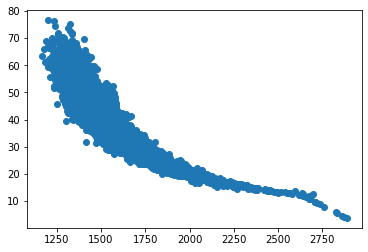

In [38]:
plt.scatter(x='Rotational speed [rpm]',y='Torque [Nm]',data=maintenance_data)
#plt.plot(maintenance_data['Rotational speed [rpm]'],maintenance_data['Torque [Nm]'])

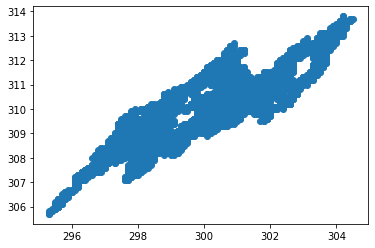

In [39]:
plt.scatter(x='Air temperature [K]',y='Process temperature [K]',data=maintenance_data)

### Data preprocessing

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
maintenance_data['Type']=le.fit_transform(maintenance_data['Type'])

In [42]:
maintenance_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [43]:
maintenance_data['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [44]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Machine failure', ylabel='count'>

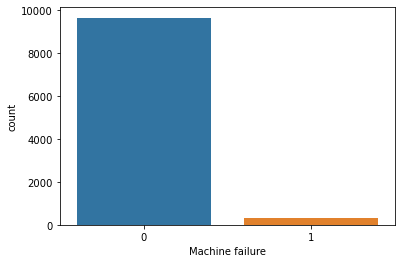

In [45]:
import seaborn as sns
sns.countplot(maintenance_data['Machine failure'])

Here, the failure case has less number of data, hence we need to upsample/downsample/SMOTE/altering the weights

<AxesSubplot:>

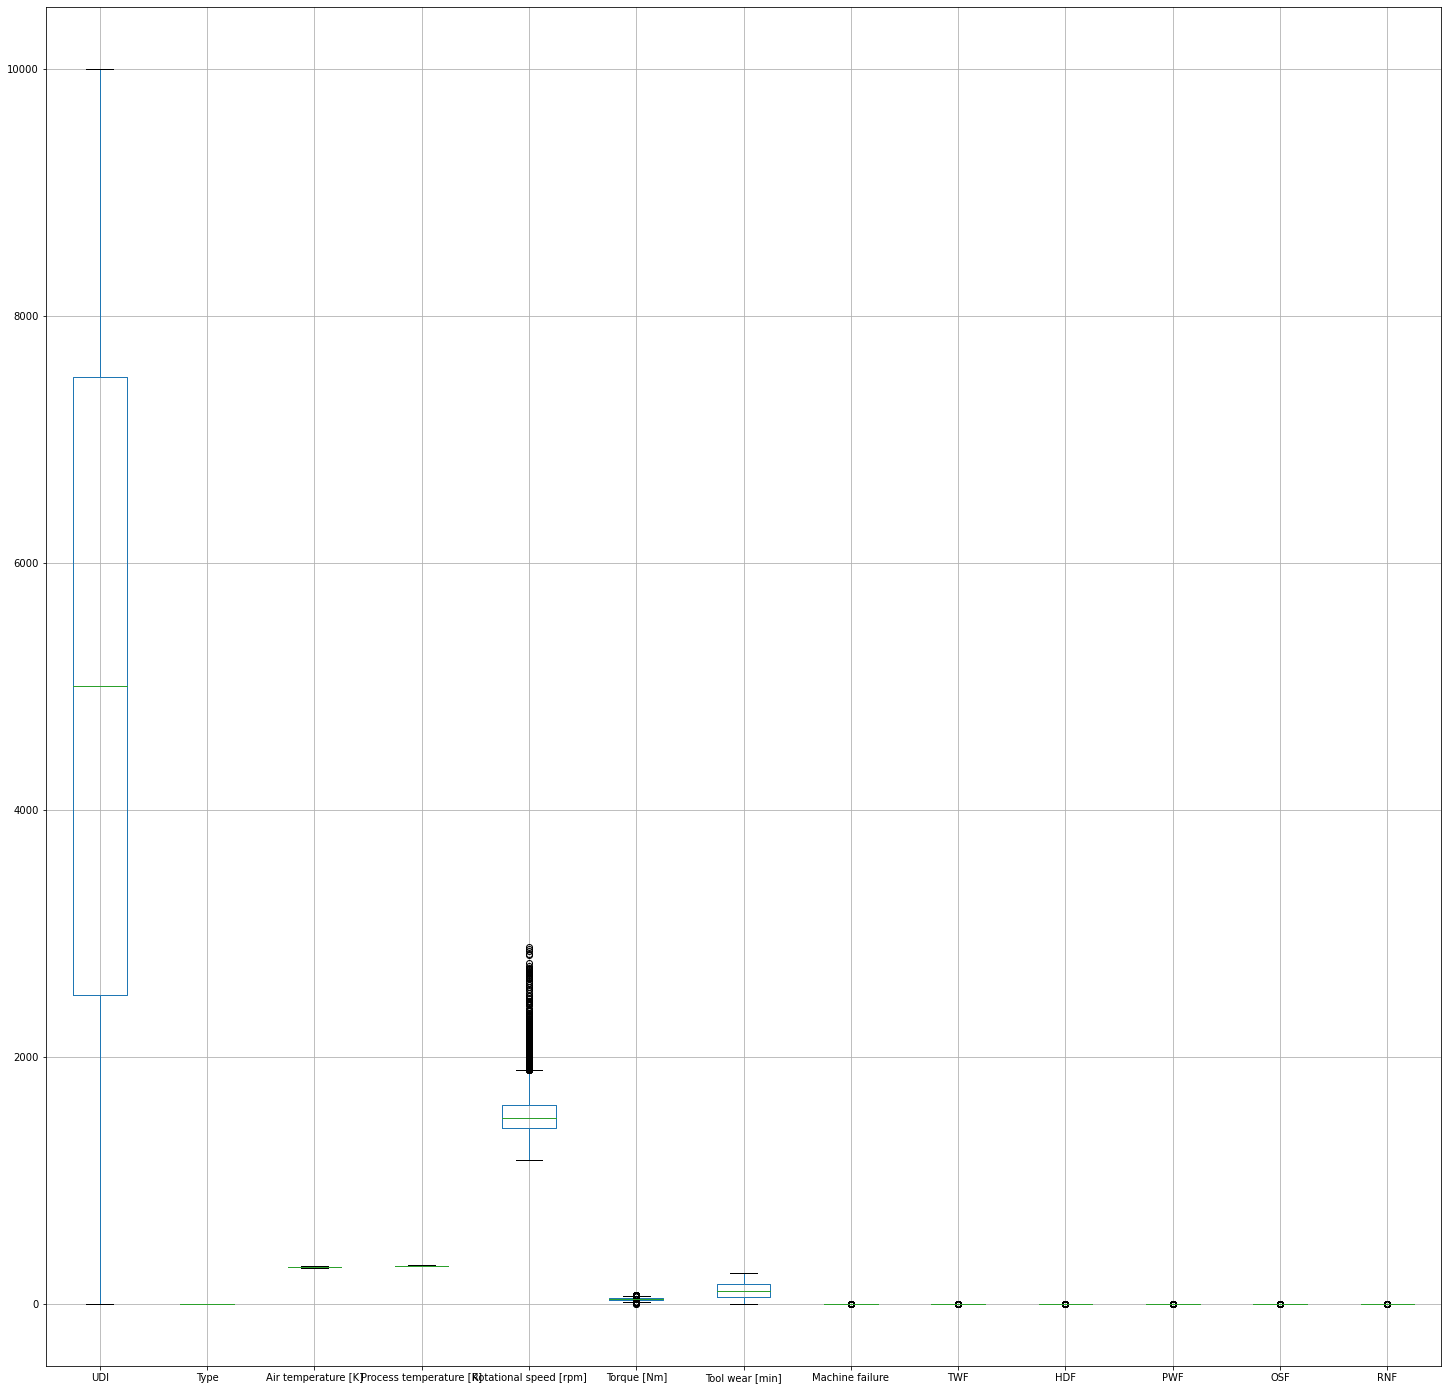

In [46]:
plt.figure(figsize=(25,25))
maintenance_data.boxplot()

In [47]:
del maintenance_data['Product ID']
del maintenance_data['UDI']

In [48]:
maintenance_data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


<AxesSubplot:>

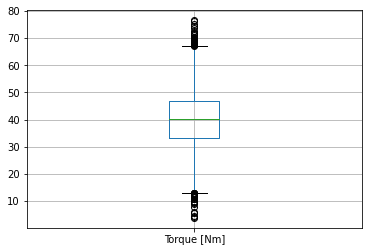

In [62]:
maintenance_data.boxplot(column= ['Torque [Nm]'])





In [63]:
Q1 = maintenance_data["Torque [Nm]"].quantile(0.25)

Q3 = maintenance_data["Torque [Nm]"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)




13.599999999999994


In [64]:
Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

print(Lower_Fence)

print(Upper_Fence)




12.800000000000011
67.19999999999999


<AxesSubplot:>

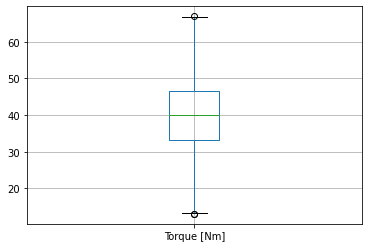

In [65]:
out= maintenance_data[((maintenance_data["Torque [Nm]"] < Lower_Fence) |(maintenance_data["Torque [Nm]"] > Upper_Fence))].index

maintenance_data = maintenance_data.drop(out, axis=0)
maintenance_data.boxplot(column= ['Torque [Nm]'])

In [69]:
plt.savefig('out.png')

<Figure size 432x288 with 0 Axes>